## *R*andom *S*ampling *plus* *F*ake *D*ata (RS+FD)

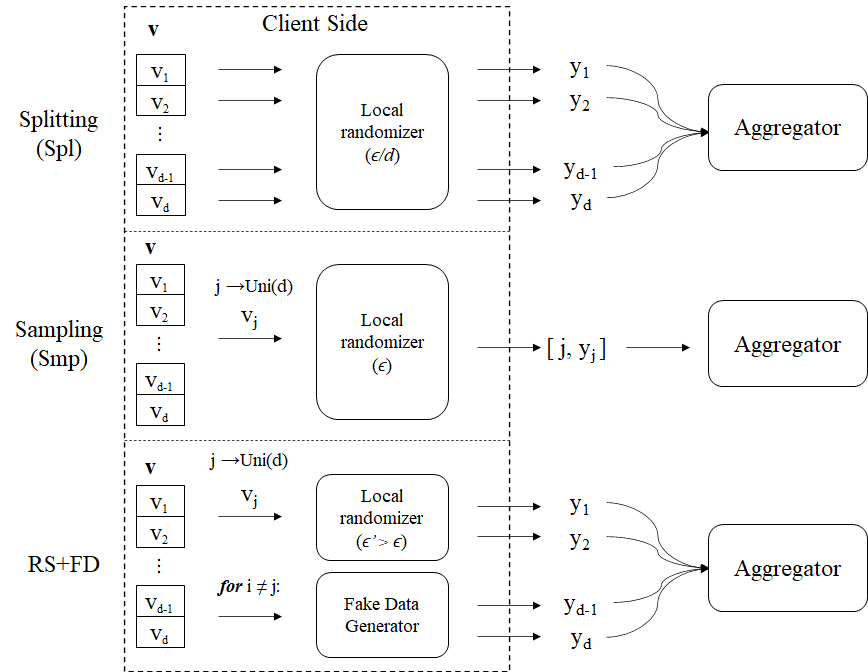

## Some libraries

In [31]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'15',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13',
          'font.size':'15',
          'legend.fontsize':'medium',
          'lines.linewidth':'2',
          'font.weight':'normal',
          'lines.markersize':'10'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
%matplotlib inline

import sympy as sym
from mpl_toolkits.mplot3d import Axes3D

## Expectation of the estimator for RS+FD[GRR] - Eq. (4)

In [32]:
n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
p = sym.Symbol('p')
q = sym.Symbol('q')
f = sym.Symbol('f')

E_n = (1/d) * (p*n*f + q*(n - n*f)) + (d-1)/(d*k) *n 
E_f = (d*E_n/(n*(p-q)) - (d-1+q*k)/(k*(p-q))) 
sym.simplify(E_f)

f

## Expectation of the estimator for RS+FD[OUE-z] - Eq. (8)

In [3]:
n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
p = sym.Symbol('p')
q = sym.Symbol('q')
f = sym.Symbol('f')

E_n = (n/d) * (p*f + q*(1-f)) + (d-1)*n*q/d 
E_f = d/(n*(p-q)) *E_n - d*q/(p-q)
sym.simplify(E_f)

f

## Expectation of the estimator for RS+FD[OUE-r] -  Eq. (10)

In [4]:
n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
p = sym.Symbol('p')
q = sym.Symbol('q')
f = sym.Symbol('f')

E_n = n/d * (f *(p-q) +q ) + (n*(d-1)/(d*k)) * (p-q+k*q)
E_f = d*E_n/(n*(p-q)) - ((p-q)*(d-1)+q*d*k)/(k*(p-q))
sym.simplify(E_f)

f

## RS+FD[GRR] Variance

In [5]:
f = 0#sym.Symbol('f')

d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_grr = sym.exp(eps)/(sym.exp(eps)+k-1)
q_grr = (1-p_grr)/(k-1)

sig4 = (1/d) * (q_grr + f*(p_grr - q_grr) + (d-1)/k)
var_RSpFD_GRR= sym.simplify((d**2 * sig4 * (1-sig4))/(p_grr-q_grr)**2)
var_RSpFD_GRR

(k + (d - 1)*(k + exp(\epsilon) - 1))*(d*k*(k + exp(\epsilon) - 1) - k - (d - 1)*(k + exp(\epsilon) - 1))/(k**2*(1 - exp(\epsilon))**2)

## RS+FD[OUE-z] Variance

In [6]:
f = 0#sym.Symbol('f')

d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_oue = 0.5
q_oue = 1/(sym.exp(eps)+1)

sig5 = (1/d) * (d*q_oue + f*(p_oue - q_oue))
var_RSpFD_OUE_z = sym.simplify((d**2 * sig5 * (1-sig5))/(p_oue-q_oue)**2)
var_RSpFD_OUE_z

1.0*d**2/sinh(\epsilon/2)**2

## RS+FD[OUE-r] Variance

In [7]:
f = 0#sym.Symbol('f')

d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_oue = 0.5
q_oue = 1/(sym.exp(eps)+1)

sig6 = (1/d) * (f*(p_oue-q_oue) + q_oue + (d-1)*(p_oue/k + (k-1)*(q_oue/k)))
var_RSpFD_OUE_r = sym.simplify((d**2 * sig6 * (1-sig6))/(p_oue-q_oue)**2)
var_RSpFD_OUE_r

4.0*(k + (d - 1)*(k + 0.5*exp(\epsilon) - 0.5))*(d*k*(exp(\epsilon) + 1) - k - (d - 1)*(k + 0.5*exp(\epsilon) - 0.5))/(k**2*(1 - exp(\epsilon))**2)

## Analytical analysis: RS+FD[ADP]

In [8]:
f = 0

n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_grr = sym.exp(eps)/(sym.exp(eps)+k-1)
q_grr = (1-p_grr)/(k-1)

sig4 = (1/d) * (q_grr + f*(p_grr - q_grr) + (d-1)/k)
var_RSpFD_GRR= sym.simplify((d**2 * sig4 * (1-sig4))/(n*(p_grr-q_grr)**2))

p_oue = 0.5
q_oue = 1/(sym.exp(eps)+1)

sig5 = (1/d) * (d*q_oue + f*(p_oue - q_oue))
var_RSpFD_OUE_z = sym.simplify((d**2 * sig5 * (1-sig5))/(n*(p_oue-q_oue)**2))
resul = sym.simplify(var_RSpFD_GRR-var_RSpFD_OUE_z)
resul

-(2.0*d**2*k**2*(exp(\epsilon) - 1)**2 + 2*(k + (d - 1)*(k + exp(\epsilon) - 1))*(-d*k*(k + exp(\epsilon) - 1) + k + (d - 1)*(k + exp(\epsilon) - 1))*sinh(\epsilon/2)**2)/(k**2*n*(exp(\epsilon) - 1)**2*(cosh(\epsilon) - 1))

In [9]:
def Variance_RSpFD_ADP(d, k, eps=np.log(3)):
    
    n= 10000
    f=0
    
    p1 = np.exp(eps)/(np.exp(eps)+k-1)
    q1 = (1-p1)/(k-1)
    
    p2 = 1/2
    q2 = 1/(np.exp(eps) +1)
    delta1 = (q1 + f*(p1-q1) + (d-1)/k)
    d1md1 = delta1 * (1-delta1)
    #print("delta1 (1 - delta1)",d1md1)
    delta2 = (d* q2 + f*(p2-q2))
    ineq = delta1*(d-delta1)*(p2-q2)**2 - delta2 * (d - delta2) * (p1 - q1) ** 2
    
    return -(2.0*d**2*k**2*(np.exp(eps) - 1)**2 + 2*(k + (d - 1)*(k + np.exp(eps) - 1))*(-d*k*(k + np.exp(eps) - 1) + k + (d - 1)*(k + np.exp(eps) - 1))*np.sinh(eps/2)**2)/(k**2*n*(np.exp(eps) - 1)**2*(np.cosh(eps) - 1))

## Generating Fig. 5 of the paper

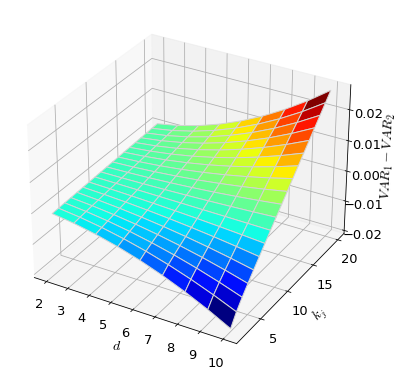

In [10]:
x = np.arange(2,11,1) #number of attributes
y = np.arange(2,21,1) #number of values per attribute
X, Y = np.meshgrid(x, y)
Z = Variance_RSpFD_ADP(X, Y)
fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='lightgrey')
ax.set_xlabel('$d$', fontsize = 14)
ax.set_ylabel('$k_j$', fontsize = 14)
ax.set_yticks([5,10,15,20])
ax.set_zlabel('$VAR_1 - VAR_2$', fontsize = 14)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.savefig('fig_surface_variance.png',dpi=500, bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

## Analytical VS experimental

In [11]:
def Var_RSpFD_GRR(n, d, k, p, q):
    f_vi = 1/k  #uniform distribution
    
    sig4 = (1/d) * (q + f_vi*(p-q) + (d-1)/k)
    
    var_4 = ((d**2 * sig4 * (1-sig4))/(n*(p-q)**2))
    
    return var_4

def Var_RSpFD_OUE_z(n, d, k, p, q):
    f_vi = 1/k  #uniform distribution
    
    sig5 = (1/d) * (d*q + f_vi * (p-q))
    
    var_5 = ((d**2 * sig5 * (1-sig5))/(n*(p-q)**2))
    
    return var_5

def Var_RSpFD_OUE_r(n, d, k, p, q):
    f_vi = 1/k  #uniform distribution
    
    sig6 = (1/d) * (f_vi * (p-q) + q + (d-1) * ((p/k) + ((k-1)/(k))*q) )
    
    var_6 = ((d**2 * sig6 * (1-sig6))/(n*(p-q)**2))
    
    return var_6

## Analytical Evaluation

In [12]:
lst_eps = [round(np.log(val),4) for val in range(2,8)] # range of epsilon used in the experiments

# Parameters of Synthetic dataset 5. Cf. Subsection 4.1 - Setup of experiments, Synthetic datasets
n = 500000 #number of users
d = 10 #number of attributes
beta = 1/d #sampling rate
K = list(np.arange(10,101,10)) #number of values per attribute

lst_var_RSpFD_GRR = []
lst_var_RSpFD_OUE_z = []
lst_var_RSpFD_OUE_r = []

for eps in lst_eps:
    eps_l = np.log((np.exp(eps) - 1 + beta)/beta)
    
    lst_eps4 = []
    lst_eps5 = []
    lst_eps6 = []
    for k in K:
        
        p = np.exp(eps_l) / (np.exp(eps_l) + k - 1) # GRR
        q = (1 - p) / (k - 1) # GRR
        
        p_sue = 1/2 #OUE
        q_sue = np.exp(eps_l)/(np.exp(eps_l)+1) #OUE
        
        lst_eps4.append(Var_RSpFD_GRR(n, d, k, p, q))
        
        
        lst_eps5.append(Var_RSpFD_OUE_z(n, d, k, p_sue, q_sue))
        
        lst_eps6.append(Var_RSpFD_OUE_r(n, d, k, p_sue, q_sue))
           
    lst_var_RSpFD_OUE_r.append(np.mean(lst_eps6))    
    lst_var_RSpFD_GRR.append(np.mean(lst_eps4))
    lst_var_RSpFD_OUE_z.append(np.mean(lst_eps5))

## Reading Experimental Evaluation results

In [13]:
syn5_rs_dd_grr = pd.read_csv('results/synthetic5/final_results_rs_dd_grr.csv', header=None, index_col=0)
syn5_rs_dd_oue_z = pd.read_csv('results/synthetic5/final_results_rs_dd_oue_z.csv', header=None, index_col=0)
syn5_rs_dd_oue_r = pd.read_csv('results/synthetic5/final_results_rs_dd_oue_r.csv', header=None, index_col=0)
syn5_rs_dd_grr.shape, syn5_rs_dd_oue_z.shape, syn5_rs_dd_oue_r.shape #100 evaluations

((100, 6), (100, 6), (100, 6))

## Plotting Curves

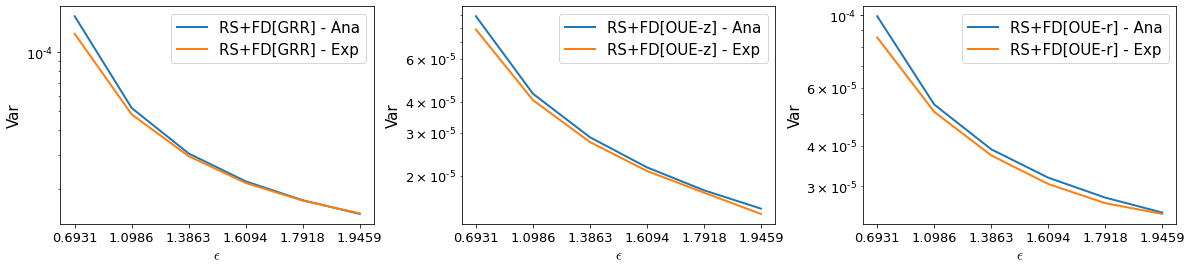

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
plt.subplots_adjust(wspace=0.28)

ax[0].plot(lst_var_RSpFD_GRR, label='RS+FD[GRR] - Ana')
ax[0].plot(syn5_rs_dd_grr.mean().values, label='RS+FD[GRR] - Exp')
ax[1].plot(lst_var_RSpFD_OUE_z, label='RS+FD[OUE-z] - Ana')
ax[1].plot(syn5_rs_dd_oue_z.mean().values, label='RS+FD[OUE-z] - Exp')
ax[2].plot(lst_var_RSpFD_OUE_r, label='RS+FD[OUE-r] - Ana')
ax[2].plot(syn5_rs_dd_oue_r.mean().values, label='RS+FD[OUE-r] - Exp')

for i in range(3):
    ax[i].set_xticks(range(len(lst_eps)))
    ax[i].set_xticklabels(lst_eps)
    ax[i].legend();
    ax[i].set_ylabel('Var')
    ax[i].set_xlabel('$\epsilon$')
    ax[i].set_yscale('log')